In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas_profiling as pp
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# reading the data 
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
to_categorical=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

from sklearn.preprocessing import LabelEncoder

L_encoder=LabelEncoder()

for label in to_categorical:
    df[label]=L_encoder.fit_transform(df[label])

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [5]:
df["Age"]=pd.cut(df["Age"],4,labels=[1,2,3,4])
df["Cholesterol"]=pd.cut(df["Cholesterol"],3,labels=[1,2,3])
df["MaxHR"]=pd.cut(df["MaxHR"],3,labels=[1,2,3])
df["Oldpeak"]=pd.cut(df["Oldpeak"],2,labels=[1,2])

In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1,1,1,140,2,0,1,3,0,1,2,0
1,2,0,2,160,1,0,1,3,0,1,1,1
2,1,1,1,130,2,0,2,1,0,1,2,0
3,2,0,0,138,2,0,1,2,1,1,1,1
4,3,1,2,150,1,0,1,2,0,1,2,0


In [7]:
df['Age']=df['Age'].astype(int)
df['Cholesterol']=df['Cholesterol'].astype(int)
df['MaxHR']=df['MaxHR'].astype(int)
df['Oldpeak']=df['Oldpeak'].astype(int)

In [8]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1,1,1,140,2,0,1,3,0,1,2,0
1,2,0,2,160,1,0,1,3,0,1,1,1
2,1,1,1,130,2,0,2,1,0,1,2,0
3,2,0,0,138,2,0,1,2,1,1,1,1
4,3,1,2,150,1,0,1,2,0,1,2,0


Text(0.5, 1.0, 'Data correlations')

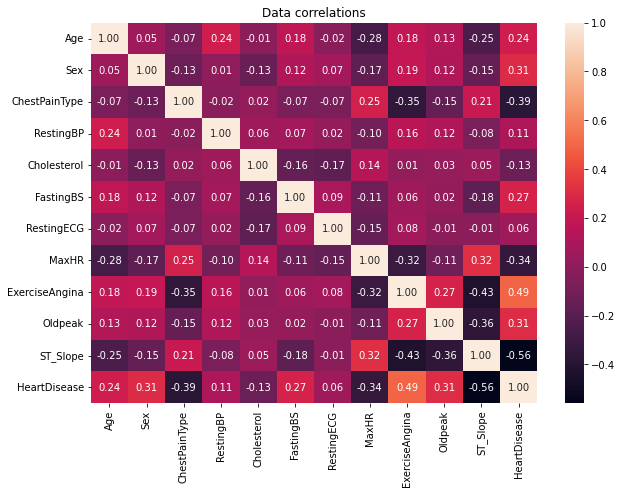

In [9]:
# data correlation 
correlation=df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation,annot=True,fmt='.2f',annot_kws={'size': 10})
plt.title("Data correlations")

Text(0.5, 1.0, 'Maximum six features affect the diseas')

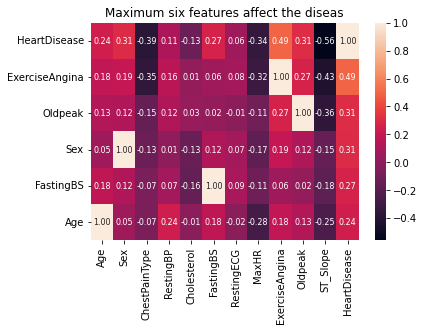

In [10]:
max_6_corr=correlation.nlargest(6,"HeartDisease")
sns.heatmap(max_6_corr,annot=True,fmt=".2F",annot_kws={"size":8})
plt.title('Maximum six features affect the diseas')

In [13]:
df.to_csv("HeartData2.csv")